# Анализ оттока клиентов Метанпромбанка

# Материалы:

* [Презентация](https://disk.yandex.ru/i/RS_q_FpEGB4zcw)

- Банк в срочном порядке ищет аналитиков уверенным владением «Python». Главной задачей которых станет анализ оттока клиентов. Анализ покажет, какие клиенты уходят из банка, а так же поможет составить сегменты клиентов, которые склонны уходить из банка.

 **Задачи проекта:**
 
Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.
 
- Провести исследовательский анализ, включающий исследование корреляций и портретов клиентов;

- Сформулировать и проверить статистические гипотезы:

  - Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались;
  
  - Самостоятельно сформулировать и проверить как минимум еще одну статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование;
  
- Сделать выводы о том, какие признаки стратегическим образом влияют на отток и какие значения или интервалы этих признаков связаны с оттоком;

- Объеденяя признаки отточности, выделить не мелкие, но компактные высокоотточные сегменты, приоритизировать их;

- Отобрать из выделенных сегментов лучшие и дать по ним рекомендации;

- Подготовить презентацию по всем ключевым моментам.

**Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. 

- `USERID` — идентификатор пользователя;

- `score` - баллы кредитного скоринга;

- `city` - город;

- `gender` - пол;

- `age` - возраст;

- `equity` - количество баллов собственности;

- `balance` - баланс на счёте;

- `products` - количество продуктов, которыми пользуется клиент;

- `credit_card` - есть ли кредитная карта;

- `last_activity` - активный клиент;

- `EST_SALARY` - оценочный доход клиента;

- `сhurn` - признак оттока.

 **План проекта:**

1. Загрузка данных. Изучение общей информации.

---
2. Предобработка данных

   2.1 Приведение названия столбцов к стилю snake_case;
   
   2.2 Обработка пропусков;
   
   2.3 Преобразование данных к нужным типам;
   
   2.4 Проверка на дубликаты;
   
   2.5 Проверка на выбросы.
  
  
---
3. Исследовательский анализ данных

   3.1 Распределение признаков по оттоку клиентов в разрезе различных параметров;
   
   3.2 Составление портретов клиентов склонных к оттоку и нет;
   
   3.3 Корреляционный анализ признака churn с другими признаками. Матрица корреляций.

 
---
4. Проверка статистических гипотез

   4.1 Гипотеза о равенстве доходов между ушедшими и оставшимися клиентами;
   
   4.2 Гипотеза о влиянии баллов собственности на отток клиентов;
   
   4.3 Гипотеза о влиянии количества используемых продуктов на отток клиентов.


---
5. Промежуточные выводы


---
6. Сегментация пользователей банка:

   6.1 Сегментация пользователей банка по трем признакам;
   
   6.2 Приоритизация сегментов
  
---
7. Выводы и рекомендации для заказчика по каждому из сегментов.


# 1. Загрузка данных. Изучение общей информации

In [1]:
# Устанавливаем библиотеку phik для расчета корреляции между переменными

!pip install phik

In [2]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 6)})
import phik
from phik.report import plot_correlation_matrix
import numpy as np
import scipy.stats as st

In [3]:
# загрузка данных

bank_scrooge = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [4]:
# просмотр данных:

display(bank_scrooge.head())
display(bank_scrooge.info())
bank_scrooge.shape

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

(10000, 12)

**Выводы по 1 разделу:**

- Всего в данных 10000 строк и 12 столбцов;

- Название колонок USERID, EST_SALARY имеют нарушение стиля. Их необходимо привести к виду snake_case;

- Есть пропуски в 2 столбцах;

- Столбцы score и age нужно привести к int, так как там содержатся целые числа.

# 2. Предобработка данных

# 2.1 Приведение названия столбцов к стилю  snake_case

In [5]:
# приведем название столбцов к нижнему регистру

bank_scrooge.columns = bank_scrooge.columns.str.lower()

# переименуем столбец userid

bank_scrooge=bank_scrooge.rename(columns={'userid':'user_id'}) 

# проверим

bank_scrooge.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

# 2.2 Обработка пропусков

In [6]:
# Рассчитаем количество пропусков в процентах

percent = bank_scrooge.isna().sum() * 100 / len(bank_scrooge)
print(percent.round(2))

user_id           0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64


Так как пропусков в столбце `age` немного: менее 1 процента. Удалим их.

In [7]:
bank_scrooge = bank_scrooge.dropna(subset=['age'])

In [8]:
# проверим сколько строк осталось

print("Размер DataFrame после удаления:", bank_scrooge.shape)

Размер DataFrame после удаления: (9974, 12)


В столбце `balance` - пропущено данных более 22%. Удалить или заполнить такое количество пропусков невозможно.

Оставим пропуски как есть.

# 2.3 Преобразование данных к нужным типам

In [9]:
# преобразуем тип данных в столбце score

bank_scrooge['score'] = bank_scrooge['score'].astype('int')

In [10]:
# преобразуем тип данных в столбце age

bank_scrooge['age'] = bank_scrooge['age'].astype('int')

In [11]:
# проверим тип данных в столбцах

bank_scrooge.dtypes

user_id            int64
score              int64
city              object
gender            object
age                int64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
est_salary       float64
churn              int64
dtype: object

# 2.4 Проверка на дубликаты

In [12]:
# проверка на явные дубликаты

print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m',bank_scrooge.duplicated().sum())

Количество дубликатов в таблице: 0


Явных дубликатов нет. Проверим на неявные дубликаты.

In [13]:
# проверими данные на неявные дубликаты по столбцу user_id

print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m',bank_scrooge.duplicated('user_id').sum())

Количество дубликатов в таблице: 50


In [14]:
# посмотрим на эти дубликаты

display(bank_scrooge[bank_scrooge['user_id'].duplicated(keep=False)].sort_values(by='user_id'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0
2597,226719,990,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1
4216,226719,903,Рыбинск,Ж,63,0,NaN,1,1,0,138582.58,0
8205,227795,840,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1


Мы видим, что при одинаковых идентификаторах в столбце user_id остальные показатели различаются. Посмотрим эти дубликаты в паре user_id -  city

In [15]:
print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m',bank_scrooge.duplicated(['user_id', 'city']).sum())

Количество дубликатов в таблице: 0


# 2.5 Проверка на выбросы

Проверим данные на выбросы в столбцах score, age, equity, balance, products, est_salary.

In [16]:
# список для столбцов

columns_to_check = ['score', 'age', 'equity', 'balance', 'products', 'est_salary']    

# зададим функцию, которая построит boxplot для каждого столбца из списка 

def plot_boxplots(df, columns):
    
    for column in columns:
        df.boxplot(column=column)
        plt.title(f'Boxplot для столбца {column}') 
        plt.ylabel(column) 
        plt.show()

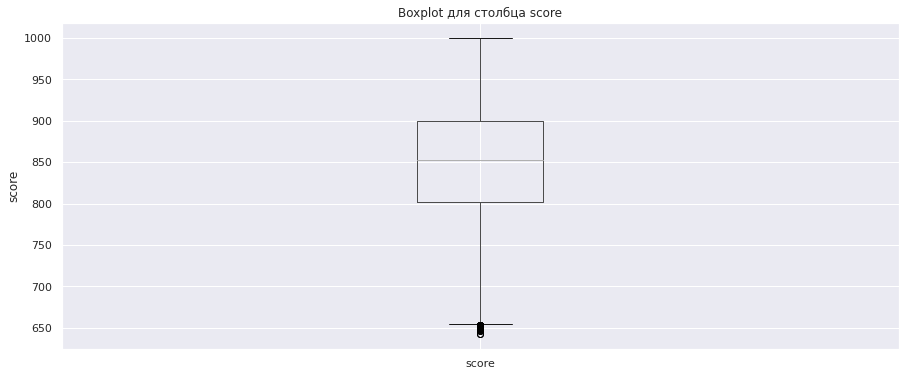

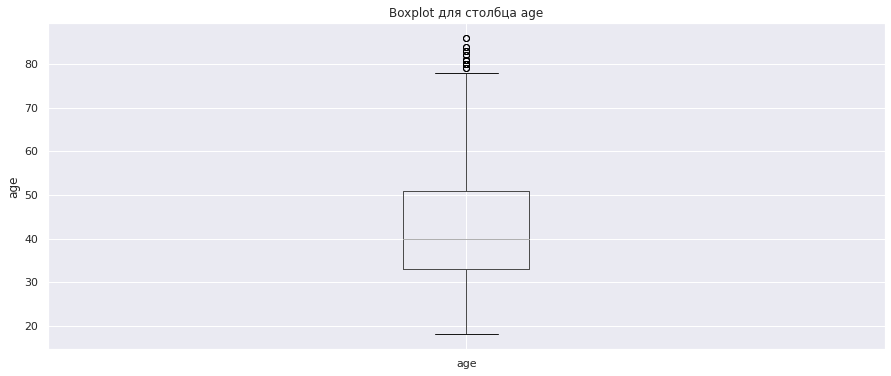

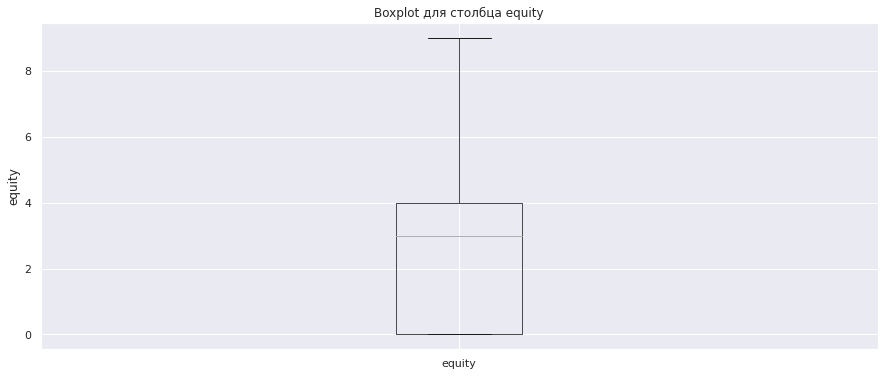

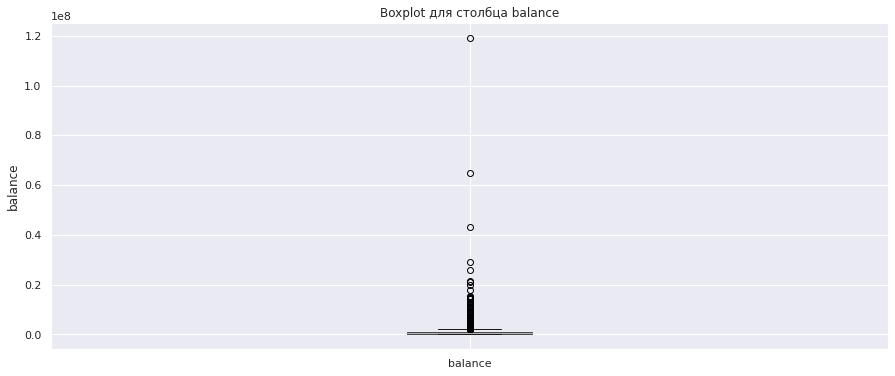

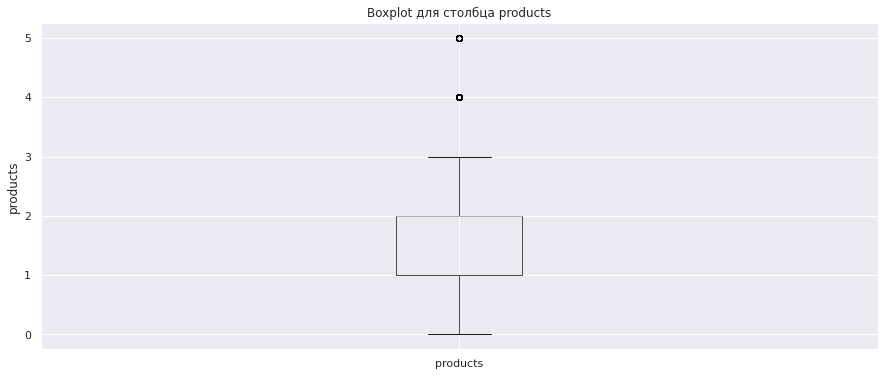

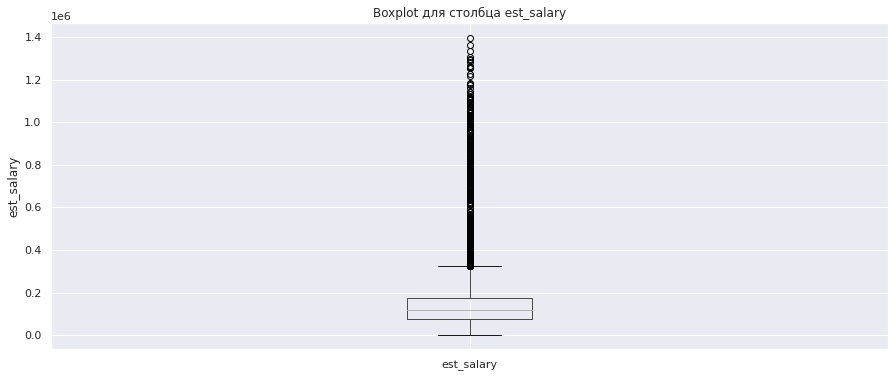

In [17]:
# Вызовем функцию

plot_boxplots(bank_scrooge, columns_to_check)

- В столбце `score` (баллы кредитного скоринга) диапазон данных от 640 до 1000. Основная часть данных не содержит каких-либо аномалий. Однако стоит отметить наличие небольшого числа выбросов ниже 650.

---
- В столбце `age` (возраст) основная часть данных по возрасту находится в диапазоне от 18 до 80 лет. Есть несколько клиентов, возраст которых выше 80 лет. Эти точки можно рассматривать как выбросы, так как они находятся далеко от основного распределения.Выбросы есть, и они не являются чем-то необычным для данных о возрасте. 

---
- В стобце `equity` (количество баллов собственности) диапазон данных от 0 до 9. Клиенты могут не иметь собственности вообще или иметь баллы собственности равные 9. Выбросов на графике нет. Здесь тоже все в порядке.

---
- В стобце `balance` (баланс на счёте) диапазон данных от 0 до 120 млн. Есть большое количество выбросов выше верхнего "уса" boxplot. Они располагаются в диапазоне от 20 млн до 120 млн. Это значит, что в банке есть клиенты как с очень низкими, так и с очень высокими балансами.

---
- В стобце `products` (количество продуктов, которыми пользуется клиент) диапазон данных от 0 до 5.Есть несколько выбросов выше верхнего "уса" boxplot. Они располагаются на отметках 4 и 5. Это говорит о том, что некоторые клиенты активно пользуются большим количеством продуктов банка. Клиенты с 0 продуктами заслуживают более пристального внимания. Возможно, они являются новыми клиентами, которые еще не успели подключить продукты, или есть какие-то проблемы с данными.

---
- В стобце `est_salary` (оценочный доход клиента) диапазон данных от 0 до 1 400 000. Есть большое количество выбросов выше верхнего "уса" boxplot. Они располагаются в диапазоне от 200 тыс. до 1,4 млн. Широкий диапазон значений говорит о том, что в выборке есть клиенты с как очень низкими, так и очень высокими доходами. 

In [18]:
# Рассмотрим детальнее нулевые значения в столбце products

products_clients_0 = bank_scrooge[bank_scrooge['products'] == 0]
print("Клиенты с 0 продуктами:")
display(products_clients_0)
print(f"Количество клиентов с 0 продуктами: {products_clients_0.shape[0]}")

Клиенты с 0 продуктами:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Количество клиентов с 0 продуктами: 1


In [19]:
# удалим эту строку

user_id_to_drop = 147837

bank_scrooge = bank_scrooge[bank_scrooge['user_id'] != user_id_to_drop]

# проверим сколько строк осталось
print("Размер DataFrame после удаления:", bank_scrooge.shape)

Размер DataFrame после удаления: (9973, 12)


**Выводы по 2 разделу:**

- Данные были подготовлены к дальнейшему исследованию:

    - Название столбцов `USERID`, `EST_SALARY` были преведены к виду snake_case;
    
    - Были обнаружены пропуски: пропуски в столбце `age` удалили, так как их всего 0,26 % ; пропусков в столбце `balance` более 22%, было принято решение не удалять и не заполнять их, чтобы не исказить данные;
    
    - Столбцы `score` и `age`приведены к типу int;
    
    - Данные были проверены на явные и неявные дубликаты - дубликатов не обнаружено
    
    - Данные были проанализированы на выбросы. Удалена одна строка с клиентом, количество продуктов банка которого равнялась нулю.

# 3.  Исследовательский анализ данных

# 3.1 Распределение признаков по оттоку клиентов в разрезе различных параметров

In [20]:
# зададим фукцию для построения гистограмм для числовых значений параметров

def plot_distributions(df, target_column='churn', include_columns=None):
   
    if include_columns is None:
        include_columns = df.columns.tolist() 
    
    for column in include_columns:
        if column == target_column: # Пропускаем целевой столбец
           continue

        sns.histplot(data=df,
                     x=column,
                     hue=target_column,
                     stat="density",
                     common_norm=False,
                     palette="Set2")
        plt.title(f'Распределение признака "{column}"')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

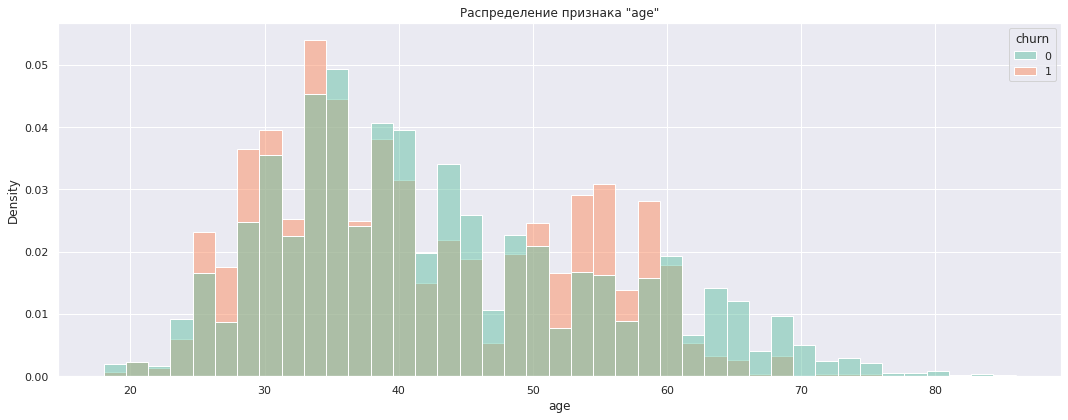

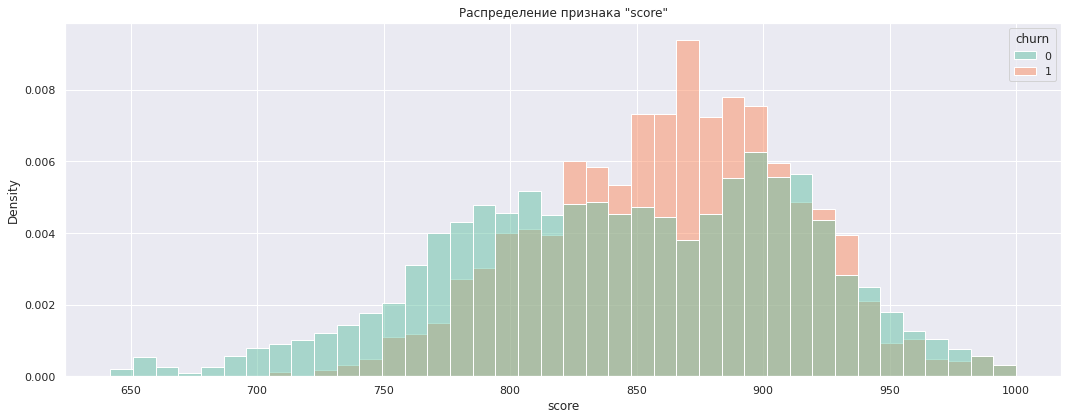

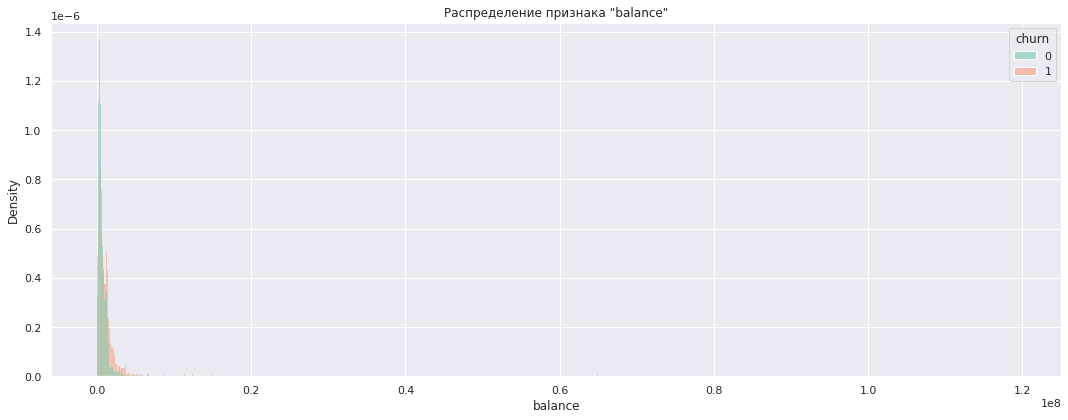

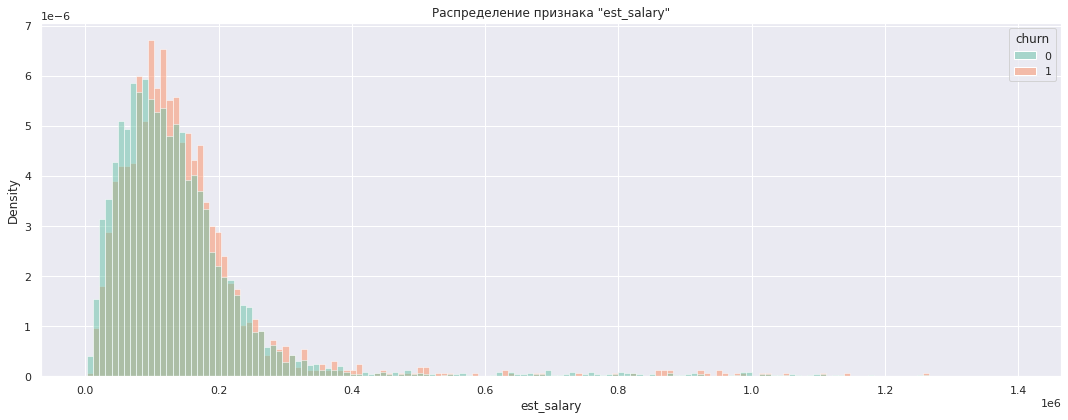

In [21]:
# вызовим функцию

plot_distributions(bank_scrooge, include_columns=['age', 'score', 'balance', 'est_salary'])

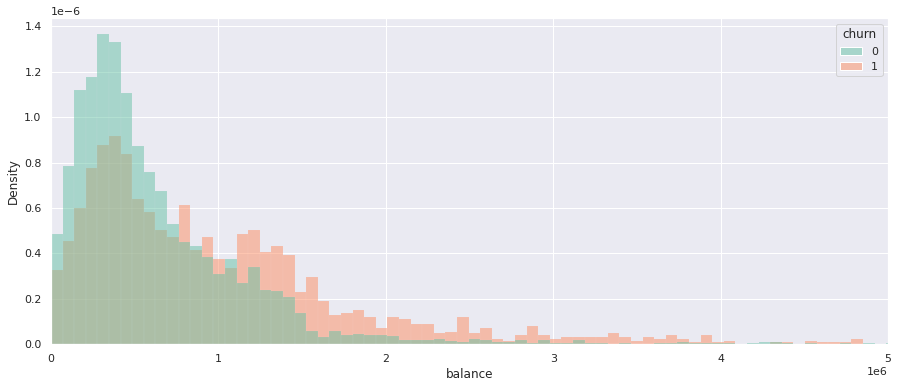

In [22]:
# для баланса зададим лимит по оси х для более детального рассмотрения

sns.histplot(data=bank_scrooge,
           hue="churn",
           x="balance",
           stat="density",
           common_norm=False,
           palette="Set2"
)
plt.xlim(0, 5000000)
plt.show()

***Влияние возраста клиента на его уход:***

- Наиболее отточными клиентами являются люди двух возрастных групп: 26-35 лет и от 50 до 59 лет;

- Наименее отточными клиентами являются люди 35 - 49 лет и пожилые люди старше 60 лет.

---
***Влияние баллов кредитного скоринга клиента на его уход:***

- Наиболее высокоотточные клиенты со скорингом от 825 до 935 баллов;

- Наименне отточные клиенты - от 650 до 825 баллов.

---
***Влияние баланса на уход клиента:***

- Количество отточных клиентов резко возрастает если баланс составляет от 760 000 и выше;

- Наименее отточные клиенты - люди с балансом до 700 000.

---
***Влияние оценочного дохода клиента на его уход:***

- Люди, с оценочным доходом от 100 000 до 200 000 являются самыми высокоотточными клиентами;

- Наименее отточные клиенты с доходом до 65 000.

In [23]:
# зададим фукцию для построения гистограмм для категориальных значений параметров

def plot_distributions_categories (df, target_column='churn', include_columns=None):
   
    if include_columns is None:
        include_columns = df.columns.tolist() 
    
    for column in include_columns:
        if column == target_column: # Пропускаем целевой столбец
           continue

        sns.histplot(data=df,
                     x=column,
                     hue=target_column,
                     stat="density",
                     common_norm=False,
                     discrete=True,
                     palette="Set2")
        plt.title(f'Распределение признака "{column}"')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

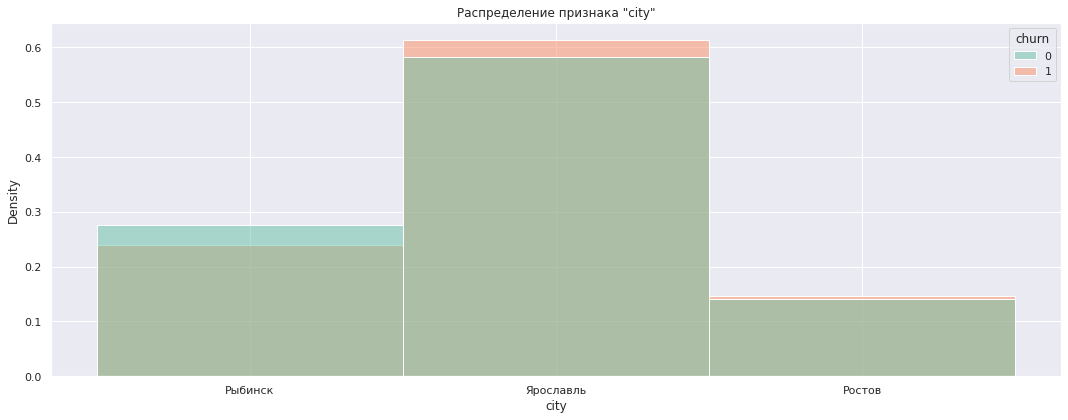

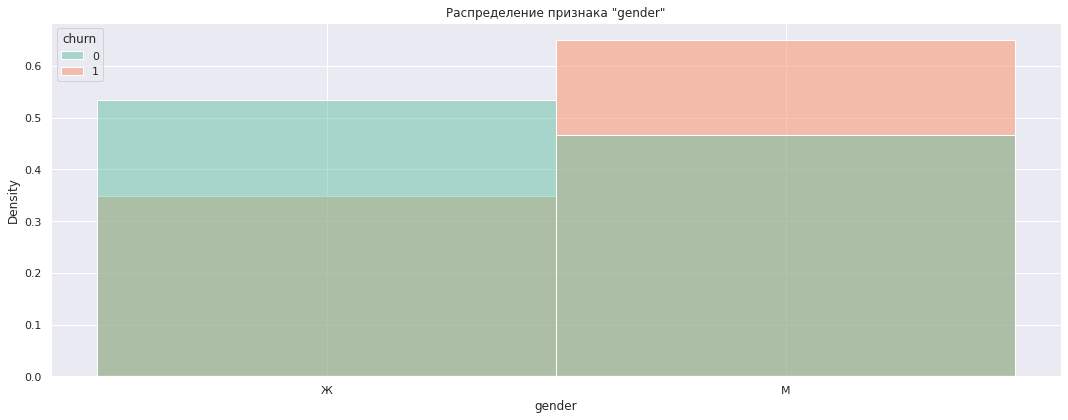

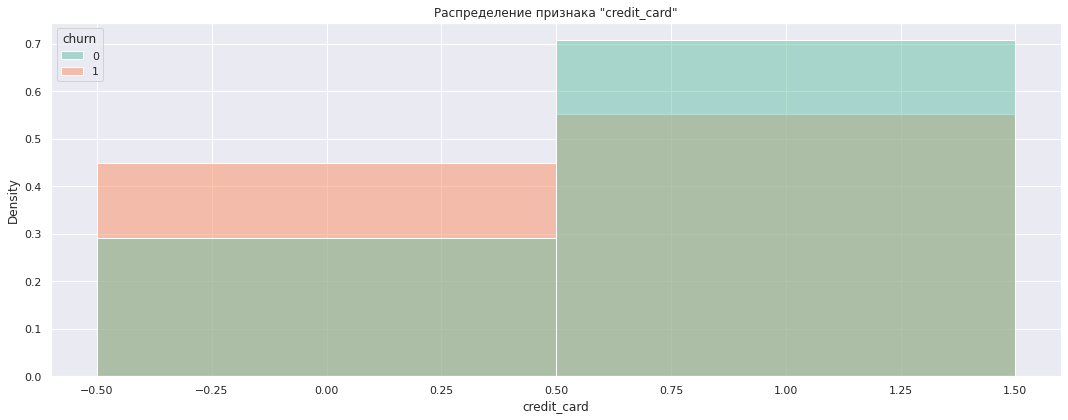

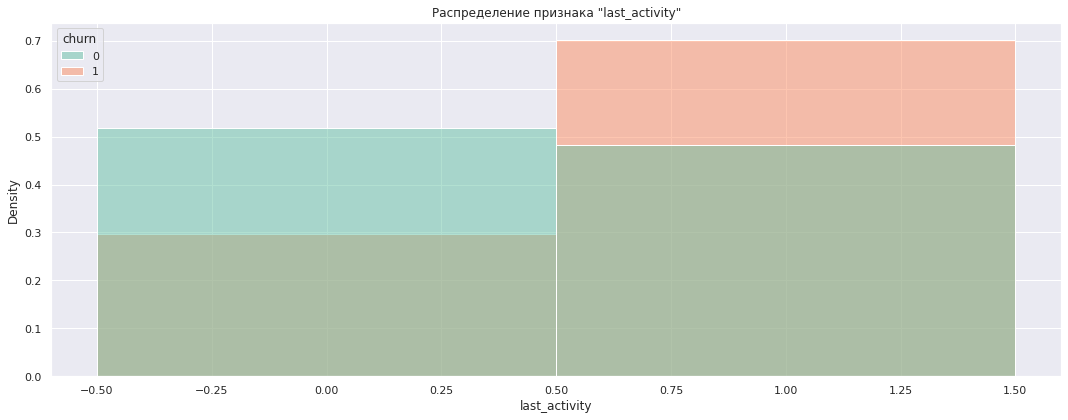

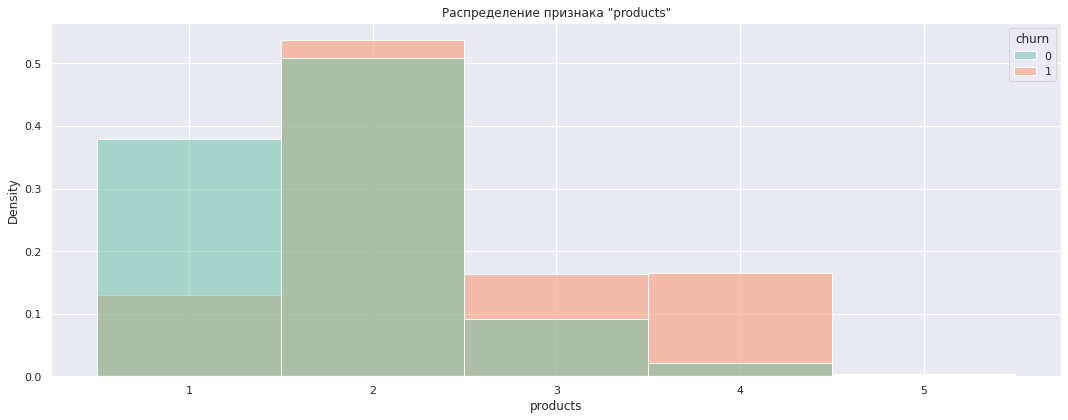

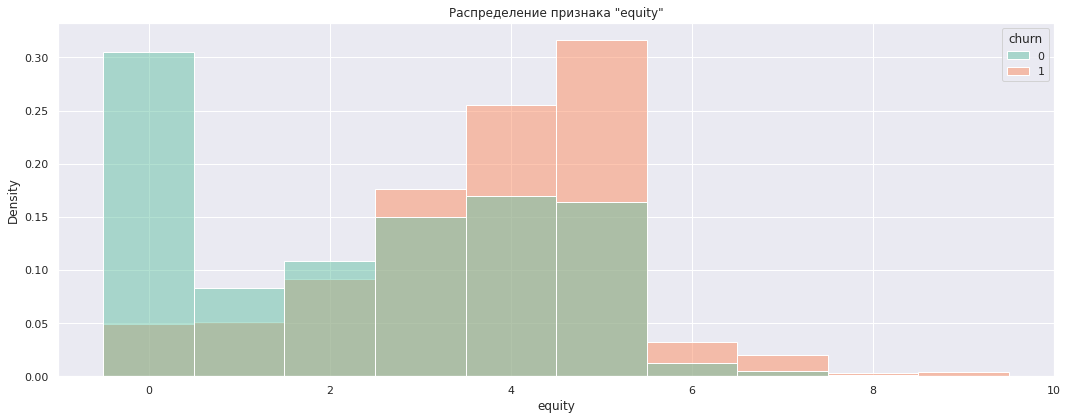

In [24]:
# вызовим функцию

plot_distributions_categories (bank_scrooge, include_columns=['city', 'gender', 'credit_card', 'last_activity', 'products', 'equity'])

***Влияние города клиента на его уход:***

- Наиболее отточными клиентами являются люди, проживающие в Ярославле;

- Наименее отточные клиенты в Рыбинске;

- Поскольку значимых различий по оттоку между тремя городами не обнаружено, эту характеристику можно не учитывать в дальнейшем исследовании.

---
***Влияние пола клиента на его уход:***

- Наиболее отточные клиенты - это клиенты мужского пола.

---
***Влияние наличия кредитной карты у клиента на его уход:***

- Клиенты, не имеющие кредитной карты, покидают банк чаще.

---
***Влияние признака активности клиента на его уход:***

- Наиболее активные клиенты уходят из банка, посравнению с неактивными.

---
***Влияние количества продуктов банка на уход клиента:***

- Наиболее отточными клиентами являются клиенты, имеюшие 4 продукта;

- На втором месте по отточности клиенты, имеющие 3, а затем 2 продукта;

- Наименне оттточные клиенты - клиенты банка, имеющие только один продукт.

---
***Влияние количества баллов собственности клиента на его уход:***

- При увеличении количества баллов собственности клиента, увеличивается вероятность оттока клиентов;

- Клиенты с количеством баллов собственности от 3 до 9 являются отточными.

# 3.2 Составление портретов клиентов склонных к оттоку и нет

**На основании анализа, проведенного в первой части, составим портреты клиентов, склонные к оттоку и не склонные к нему**

**Портрет клиента, склонного к оттоку:**

  ***Возраст:***
  
     - В диапазоне 26-35 лет или 50-59 лет.
     
  ***Кредитный скоринг:***
  
     - Имеет высокий скоринг (между 825 и 935 баллами).
     
  ***Количество баллов собственности:***
  
     - Имеет от 3 до 9 баллов собственности.
     
  ***Баланс на счете:***
   
     - Баланс составляет 760 000 или выше.
     
  ***Количество продуктов банка:***
  
     - Использует 4 продукта банка (или 3, а затем 2).
     
   ***Оценочный доход:***
   
     - Имеет доход от 100 000 до 200 000.
     
   ***Пол:***
   
     - Мужской.
     
   ***Кредитная карта:***
   
     - Не имеет кредитной карты.
     
   ***Активность:***
   
     - Является активным клиентом.

---
**Резюме портрета:**

  - Молодой (26-35) или предпенсионного возраста мужчина, с  доходом (100 000-200 000), высоким кредитным скорингом (825-935), имеющий 3-4 банковских продукта, но не кредитную карту и с балансом более 760 000, демонстрирующий высокую активность.

**Портрет клиента, склонного к удержанию:**

   ***Возраст:***
   
     - В диапазоне 35-49 лет или старше 60 лет.
     
   ***Кредитный скоринг:***
   
     - Имеет скоринг от 650 до 825 баллов.
     
   ***Количество баллов собственности:***

     - Имеет небольшое количество баллов собственности (менее 3).
     
   ***Баланс на счете:***
   
     - Баланс ниже 700 000.
     
   ***Количество продуктов банка:***
   
     - Использует только 1 продукт банка.
     
   ***Оценочный доход:***
   
     - Имеет доход до 65 000.
     
   ***Пол:***
   
     - Женский.
     
   ***Кредитная карта:***
   
    - Имеет кредитную карту.
    
   ***Активность:***
   
    - Не очень активный клиент.

---
**Резюме портрета:**

- Женщина в зрелом возрасте (35-49) или пожилого возраста (60+), с низким доходом (до 65 000), умеренным кредитным скорингом (650-825), имеющая только 1 продукт банка и баланс до 700 000, с кредитной картой и не очень высокой активностью.


**Для сравнения создадим сводную таблицу со статистиками для отточных и неотточных клиентов**

In [25]:
# создаем функцию

def describe_by_churn_custom(df):
  
   numerical_cols = df.select_dtypes(include=np.number).columns.tolist() 
   if 'churn' in numerical_cols:
        numerical_cols.remove('churn')
    
   categorical_cols = df.select_dtypes(include='object').columns.tolist()

   summary = pd.DataFrame(columns=['Показатели', 'Отточные', 'Неотточные'])

   summary.loc[0, 'Показатели'] = 'Средний балл скоринга'
   for churn_value in [1,0]:
       summary.loc[0, 'Отточные' if churn_value==1 else 'Неотточные'] = df[df['churn'] == churn_value]['score'].mean()


   summary.loc[1, 'Показатели'] = 'Пол'
   for churn_value in [1,0]:
       summary.loc[1, 'Отточные' if churn_value==1 else 'Неотточные'] = df[df['churn'] == churn_value]['gender'].mode()[0]


   summary.loc[2, 'Показатели'] = 'Средний возраст'
   for churn_value in [1,0]:
       summary.loc[2, 'Отточные' if churn_value==1 else 'Неотточные'] = df[df['churn'] == churn_value]['age'].mean()

   summary.loc[3, 'Показатели'] = 'Медиана баллов собственности'
   for churn_value in [1,0]:
       summary.loc[3, 'Отточные' if churn_value==1 else 'Неотточные'] = df[df['churn'] == churn_value]['equity'].median()

   summary.loc[4, 'Показатели'] = 'Медианный баланс на счете'
   for churn_value in [1,0]:
        summary.loc[4, 'Отточные' if churn_value==1 else 'Неотточные'] = df[df['churn'] == churn_value]['balance'].median()

   summary.loc[5, 'Показатели'] = 'Среднее количество продуктов'
   for churn_value in [1,0]:
       summary.loc[5, 'Отточные' if churn_value==1 else 'Неотточные'] = df[df['churn'] == churn_value]['products'].mean()

   summary.loc[6, 'Показатели'] = 'Наличие кредитной карты'
   for churn_value in [1,0]:
       summary.loc[6, 'Отточные' if churn_value==1 else 'Неотточные'] = df[df['churn'] == churn_value]['credit_card'].mode()[0]

   summary.loc[7, 'Показатели'] = 'Активность'
   for churn_value in [1,0]:
        summary.loc[7, 'Отточные' if churn_value==1 else 'Неотточные'] = df[df['churn'] == churn_value]['last_activity'].mode()[0]

   summary.loc[8, 'Показатели'] = 'Медианная зарплата'
   for churn_value in [1,0]:
       summary.loc[8, 'Отточные' if churn_value==1 else 'Неотточные'] = df[df['churn'] == churn_value]['est_salary'].median()
   
   return summary
                   
# Вызываем функцию
summary_table = describe_by_churn_custom(bank_scrooge)

# Округляем все значения до целых чисел
summary_table[['Отточные', 'Неотточные']] = summary_table[['Отточные', 'Неотточные']].applymap(
    lambda x: int(round(x)) if isinstance(x, (int, float)) else x
)


# выводим таблицу 

display(summary_table)

,Показатели,Отточные,Неотточные
0,Средний балл скоринга,863,845
1,Пол,М,Ж
2,Средний возраст,41,43
3,Медиана баллов собственности,4,3
4,Медианный баланс на счете,783909,475410
5,Среднее количество продуктов,2,2
6,Наличие кредитной карты,1,1
7,Активность,1,0
8,Медианная зарплата,125409,118228


***1. Общая картина:***
  – В целом, основные показатели, такие как средний скоринговый балл, средний возраст и среднее количество продуктов, не показывают существенных различий между клиентами, которые ушли из банка, и теми, кто остался. Это свидетельствует о том, что отток клиентов зависит не только от очевидных характеристик, но и от более тонких факторов или их сочетаний.

---
***2. Ключевые различия:***

  – **Пол:**
       – Мужчины гораздо чаще склонны к оттоку, чем женщины.

  – **Баланс на счете:**
       – Средний баланс на счете у клиентов, которые ушли из банка, значительно выше (около 784 тысяч рублей), чем у тех, кто остался (около 475 тысяч рублей). Это может указывать на то, что клиенты с большими накоплениями более склонны искать альтернативные финансовые решения в других банках.

  – **Активность:**
       – Отточные клиенты, как правило, проявляют большую активность в использовании банковских продуктов, чем лояльные клиенты.

# 3.3 Корреляционный анализ признака churn с другими признаками.  Матрица корреляций.

In [26]:
# удалим из датафрейма столбец user_id 

bank_scrooge_slice = bank_scrooge.drop(['user_id'], axis=1)
bank_scrooge_slice.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [27]:
# построим корреляционную матрицу

phik_overview = bank_scrooge_slice.phik_matrix() 
phik_overview.round(2)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
score,1.00,0.09,0.07,0.03,0.53,0.17,0.42,0.21,0.05,0.40,0.23
city,0.09,1.00,0.01,0.09,0.06,0.04,0.13,0.07,0.03,0.17,0.02
gender,0.07,0.01,1.00,0.29,0.06,0.05,0.07,0.20,0.01,0.14,0.22
age,0.03,0.09,0.29,1.00,0.05,0.02,0.14,0.16,0.09,0.36,0.19
equity,0.53,0.06,0.06,0.05,1.00,0.00,0.58,0.22,0.05,0.29,0.35
balance,0.17,0.04,0.05,0.02,0.00,1.00,0.00,0.00,0.00,0.37,0.02
products,0.42,0.13,0.07,0.14,0.58,0.00,1.00,0.27,0.11,0.22,0.26
credit_card,0.21,0.07,0.20,0.16,0.22,0.00,0.27,1.00,0.05,0.04,0.20
last_activity,0.05,0.03,0.01,0.09,0.05,0.00,0.11,0.05,1.00,0.04,0.26
est_salary,0.40,0.17,0.14,0.36,0.29,0.37,0.22,0.04,0.04,1.00,0.05


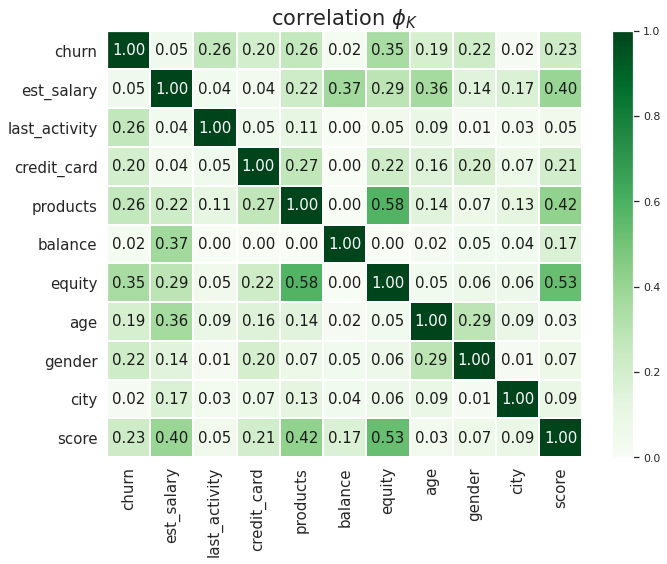

In [28]:
# Визуализируем корреляционную матрицу с помощью plot_correlation_matrix

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

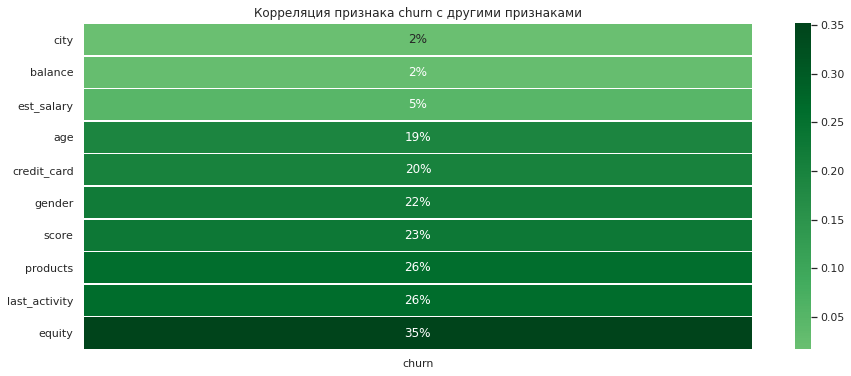

In [29]:
# Отобразим только один столбец из матрицы
# Извлекаем корреляции с churn и сортируем
df_corr_churn = phik_overview.loc[:, ['churn']].drop('churn').sort_values('churn')

# Строим heatmap
sns.heatmap(df_corr_churn, annot=True, fmt=".0%", cmap="Greens"
            , center=0, linewidths=0.5, linecolor='white')

plt.title("Корреляция признака churn с другими признаками") 
plt.show() 

**Проанализируем полученную корреляционную матрицу:**

***Для интерпретации силы связи используем шкалу Чеддока***

- 0 - 0.2 - очень слабая связь;

- 0.2 - 0.4 - слабая связь;

- 0.4 - 0.7 - средняя связь;

- 0.7 - 0.9 - высокая связь;

- 0.9 - 1 - очень высокая связь.

---
- Связь между оттоком (churn) и баллами собственности (equity) составляет около 0.35, что попадает в диапазон слабой связи согласно шкале Чеддока;

- связь между оттоком (churn) и количеством используемых продуктов банка (products) равна 0.26, что так же попадает в диапазон слабой связи.

- связь между оттоком (churn) и активностью клиента (last_activity) равна 0.26, что так же попадает в диапазон слабой связи.

---
- остальные связи между оттоком (churn) и другими признаками (оценочной зарплатой, активностью, наличием кредитной карты, балансом на счете, возрастом, полом, скорингом) очень слабые (близки к 0.0-0.2), это говорит о том, что эти характеристики по отдельности не являются основными факторами, влияющими на отток.


---
- Тот факт, что многие связи слабые, подчеркивает, что отток клиентов, скорее всего, является результатом комплексного взаимодействия нескольких факторов, а не отдельных характеристик. Нужно смотреть на комбинации признаков.


# 4. Проверка статистических гипотез

# 4.1 Гипотеза о равенстве доходов между ушедшими и оставшимися клиентами

**Нулевая гипотеза:** доходы между ушедшими и оставшимися клиентами банка равны;


**Альтернативная гипотеза:** доходы между ушедшими и оставшимися клиентами банка не равны;

**Формулирование гипотез:**

  - нулевая гипотеза формулируется через равенство;
  - альтернативная через неравенство, в данном случае двусторонее.
  
**Критерий для проверки гипотез:**

- Если, в ходе эксперимента отвергается нулевая гипотеза, принимается альтернативная.

In [30]:
# сделаем срезы ушедших и оставшихся клиентов по оценочному доходу

churn_1 = bank_scrooge.query('(churn == 1)')['est_salary']
churn_0 = bank_scrooge.query('(churn == 0)')['est_salary']

alpha = 0.05 # уровень статистической значимости


results = st.ttest_ind(churn_1, churn_0, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8500882387258035
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.
- Доходы между ушедшими и оставшимися клиентами банка равны

**При проведении корреляционного анализа была обнаружена слабая связь между оттоком и баллами собственности, между оттоком и количеством используемых продуктов банка, а также между оттоком и активностью клиента. Это наводит на мысль проверить, есть ли статистически значимое влияние этих характеристик на отток клиентов.**

***Поэтому сформулируем и проверим еще две гипотезы на основе выборок отточных и неотточных клиентов:*** 

- Гипотезу о влиянии баллов собственности на отток клиентов;

- Гипотезу о влиянии количества используемых продуктов на отток клиентов;

# 4.2 Гипотеза о влиянии баллов собственности на отток клиентов

**Нулевая гипотеза:** распределения баллов собственности между ушедшими и оставшимися клиентами банка одинаковы ;


**Альтернативная гипотеза:** распределения баллов собственности между ушедшими и оставшимися клиентами банка отличаются.

Так как у нас equity - это не нормальное распределение, мы будем использовать непараметрический U-критерий Манна-Уитни.

In [31]:
# сделаем срезы ушедших и оставшихся клиентов по количеству баллов собственности

churn_1_equity = bank_scrooge.query('(churn == 1)')['equity']
churn_0_equity = bank_scrooge.query('(churn == 0)')['equity']


alpha = 0.05 # уровень статистической значимости

results_equity = st.mannwhitneyu(churn_1_equity, churn_0_equity, nan_policy='omit')

print('p-значение:', results_equity.pvalue)

if results_equity.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.0457230851173855e-157
Отвергаем нулевую гипотезу


**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
- Распределения баллов собственности между ушедшими и оставшимися клиентами банка отличаются.

# 4.3 Гипотеза о влиянии количества используемых продуктов на отток клиентов

**Нулевая гипотеза:** количество используемых продуктов банка между ушедшими и оставшимися клиентами равны;


**Альтернативная гипотеза:** количество используемых продуктов банка между ушедшими и оставшимися клиентами не равны.

Так как у нас products - это не нормальное распределение, мы будем использовать непараметрический U-критерий Манна-Уитни.

In [32]:
# сделаем срезы ушедших и оставшихся клиентов по количеству продуктов, которые использует клиент

churn_1_products = bank_scrooge.query('(churn == 1)')['products']
churn_0_products = bank_scrooge.query('(churn == 0)')['products']

alpha = 0.05 # уровень статистической значимости

results_products = st.mannwhitneyu(churn_1_products, churn_0_products, nan_policy='omit')

print('p-значение:', results_products.pvalue)

if results_products.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1812726611971905e-161
Отвергаем нулевую гипотезу


**Вывод:**

- На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
- Количество используемых продуктов банка между ушедшими и оставшимися клиентами не равны.

# 5. Промежуточные выводы

 **Сделаем промежуточные выводы по исследовательскому и статистическому анализу данных, которые помогут нам провести сегментацию пользователей банка по нескольким признакам**

---
**Исследовательский анализ данных**

***В ходе исследовательского анализа данных мы выделили признаки, которые влияют на отток клиентов:***

 -  Возраст (в диапазоне 26-35 лет или 50-59 лет);
     
 -  Кредитный скоринг (между 825 и 935 баллами);
      
 -  Количество баллов собственности (3 до 9 баллов);
     
 -  Баланс на счете (760 000 или выше);
   
 -  Количество продуктов банка (использует 4,3 продукта банка);
     
 -  Оценочный доход (100 000 до 200 000);
      
 -  Пол (мужской);
       
 -  Кредитная карта (отсутствие)
       
 -  Активность (является активным клиентом).
   

---
**Резюме портрета:**

  - Молодой (26-35) или предпенсионного возраста мужчина, с  доходом (100 000-200 000), высоким кредитным скорингом (825-935), имеющий 3-4 банковских продукта, но не кредитную карту и с балансом более 760 000, демонстрирующий высокую активность.
  
 
 
---
**Ключевые различия в сводной таблице со статистиками по оттточным и неоточным клиентам:**

 - Пол (мужчины значительно чаще склонны к оттоку, чем женщины);

 - Баланс на счете (медианный баланс на счете значительно выше у отточных клиентов (около 784 тыс.) по сравнению с неотточными (около 475 тыс.));

 - Активность (отточные клиенты, демонстрируют большую активность в использовании банковских продуктов, чем лояльные клиенты).

---
**Корреляционный анализ данных** 

- В ходе корреляционного анализа, была обнаружена слабая связь между оттоком (churn) и баллами собственности (equity), оттоком (churn) и количеством используемых продуктов банка (products) и оттоком (churn) и активностью клиентов.

---
**Проверка статистических гипотез**

- Было проверено три статистических гипотезы:

  -  Гипотеза о равенстве доходов между ушедшими и оставшимися клиентами;
  
  -  Гипотеза о влиянии баллов собственности на отток клиентов;
  
  -  Гипотеза о влиянии количества используемых продуктов на отток клиентов;
  
  
- В результате проверки статистических гипотез удалось выяснить, что, хотя доходы между ушедшими и оставшимися клиентами банка статистически не различаются, то распределение баллов собственности, а также количества продуктов (на основе U-критерия Манна-Уитни) между ушедшими и оставшимися клиентами банка статистически значимо отличаются.

- Все гипотезы, кроме равенства доходов между ушедшими и оставшимися клиентами, были отвергнуты в пользу альтернативы.

---
**Выделим общие признаки, которые влияют на отток клиентов в банке:**

- Пол (мужской);

- Баланс на счете (760 000 или выше);

- Активность (является активным клиентом);

- Количество баллов собственности (3 до 9 баллов);

- Количество продуктов банка (использует 4,3 продукта банка);

- Кредитный скоринг (между 825 и 935 баллами).

# 6.Сегментация пользователей банка

# 6.1 Сегментация пользователей банка по трем признакам

Выделим сегменты с численностью от 500 до 2000 клиентов.

In [33]:
# создадим фукцию,которая проанализирует сегменты клиентов на основе комбинаций из трех признаков
# отфильтруем сегменты по размеру (от min_segment_size до max_segment_size)

def combined_segment_analysis(df, features, balance_threshold=760000, products_values=[3, 4], score_low=825, score_high=935, min_segment_size=500, max_segment_size=2000):
   

    feature_names = list(features.keys())
    
    for feature_combination in combinations(feature_names, 3):
        conditions = []
        for feature in feature_combination:
            if feature == 'gender':
                conditions.append(f'gender == "{features[feature]}"')
            elif feature == 'balance':
                conditions.append(f'balance >= {balance_threshold}')
            elif feature == 'last_activity':
                conditions.append(f'last_activity == {features[feature]}')
            elif feature == 'equity':
                conditions.append(f'equity >= {features[feature][0]} and equity <= {features[feature][1]}')
            elif feature == 'products':
                products_str = " or ".join([f"products == {val}" for val in products_values])
                conditions.append(f'({products_str})')
            elif feature == 'score':
                conditions.append(f'score >= {score_low} and score <= {score_high}')

        query_string = " and ".join(conditions)

        try:
            segment = df.query(query_string)
            
            if segment.empty:
                print(f"\n***Сегмент по признакам: {', '.join(feature_combination)}***")
                print("Нет клиентов, удовлетворяющих условию.")
            else:
                segment_size = segment.shape[0]
                if  min_segment_size <= segment_size <= max_segment_size:
                    print(f"\n***Сегмент по признакам: {', '.join(feature_combination)}***")
                    display(segment.head())
                    churn_count = segment['churn'].sum()
                    print('Количество отточных клиентов в сегменте:', churn_count)
                    print('Доля отточных клиентов данного сегмента, в %:', round(segment['churn'].mean() * 100))
                    print('Количество клиентов в сегменте:', segment_size)
                else:
                    print(f"\n***Сегмент по признакам: {', '.join(feature_combination)}***")
                    print(f"Размер сегмента {segment_size} не попадает в заданный диапазон от {min_segment_size} до {max_segment_size} клиентов")
        
        except Exception as e:
                print(f"Ошибка при обработке комбинации {', '.join(feature_combination)}: {e}")

In [34]:
# Словарь, содержащий параметры для анализа сегментов
features = {
    'gender': 'М',
    'balance': None,
    'last_activity': 1,
    'equity': [3, 9],
    'products': None,
    'score': None
}

# вызовем функцию

combined_segment_analysis(bank_scrooge, features)


***Сегмент по признакам: gender, balance, last_activity***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
35,221927,863,Ростов,М,39,5,1461423.33,1,0,1,221699.52,0
36,199614,822,Ярославль,М,60,5,1472483.77,1,1,1,89132.67,0
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1
77,191976,937,Ярославль,М,33,5,2061152.96,2,1,1,280670.62,1
79,191348,768,Ярославль,М,36,4,963460.20,2,1,1,120197.47,0


Количество отточных клиентов в сегменте: 421
Доля отточных клиентов данного сегмента, в %: 60
Количество клиентов в сегменте: 704

***Сегмент по признакам: gender, balance, equity***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
15,120260,731,Рыбинск,М,42,3,1480548.47,3,1,0,160974.43,0
18,136651,876,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0
20,114192,772,Ростов,М,43,3,1315511.65,2,0,0,143935.71,0


Количество отточных клиентов в сегменте: 580
Доля отточных клиентов данного сегмента, в %: 46
Количество клиентов в сегменте: 1255

***Сегмент по признакам: gender, balance, products***
Размер сегмента 357 не попадает в заданный диапазон от 500 до 2000 клиентов

***Сегмент по признакам: gender, balance, score***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
18,136651,876,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0
35,221927,863,Ростов,М,39,5,1461423.33,1,0,1,221699.52,0
44,210313,935,Ярославль,М,41,5,3781118.22,2,1,0,761349.20,0


Количество отточных клиентов в сегменте: 481
Доля отточных клиентов данного сегмента, в %: 52
Количество клиентов в сегменте: 920

***Сегмент по признакам: gender, last_activity, equity***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
14,172138,815,Ярославль,М,35,5,547499.87,2,1,1,105883.26,0
16,123335,829,Ярославль,М,45,5,507842.84,1,1,1,169330.64,0
35,221927,863,Ростов,М,39,5,1461423.33,1,0,1,221699.52,0
36,199614,822,Ярославль,М,60,5,1472483.77,1,1,1,89132.67,0
45,118849,826,Ярославль,М,31,4,333330.99,1,1,1,46981.53,0


Количество отточных клиентов в сегменте: 650
Доля отточных клиентов данного сегмента, в %: 46
Количество клиентов в сегменте: 1408

***Сегмент по признакам: gender, last_activity, products***
Размер сегмента 405 не попадает в заданный диапазон от 500 до 2000 клиентов

***Сегмент по признакам: gender, last_activity, score***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820.07,0
11,172184,921,Ростов,М,41,0,NaN,1,1,1,217469.48,0
16,123335,829,Ярославль,М,45,5,507842.84,1,1,1,169330.64,0
35,221927,863,Ростов,М,39,5,1461423.33,1,0,1,221699.52,0
45,118849,826,Ярославль,М,31,4,333330.99,1,1,1,46981.53,0


Количество отточных клиентов в сегменте: 561
Доля отточных клиентов данного сегмента, в %: 41
Количество клиентов в сегменте: 1366

***Сегмент по признакам: gender, equity, products***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
15,120260,731,Рыбинск,М,42,3,1480548.47,3,1,0,160974.43,0
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1
81,223978,850,Рыбинск,М,34,5,351583.16,4,0,1,115354.97,1
160,171716,908,Рыбинск,М,30,3,245237.57,4,1,1,78324.89,1


Количество отточных клиентов в сегменте: 327
Доля отточных клиентов данного сегмента, в %: 54
Количество клиентов в сегменте: 608

***Сегмент по признакам: gender, equity, score***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
16,123335,829,Ярославль,М,45,5,507842.84,1,1,1,169330.64,0
18,136651,876,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0
22,161656,871,Ярославль,М,51,4,708866.92,1,1,0,106407.26,0


Количество отточных клиентов в сегменте: 726
Доля отточных клиентов данного сегмента, в %: 44
Количество клиентов в сегменте: 1657

***Сегмент по признакам: gender, products, score***
Размер сегмента 434 не попадает в заданный диапазон от 500 до 2000 клиентов

***Сегмент по признакам: balance, last_activity, equity***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
35,221927,863,Ростов,М,39,5,1461423.33,1,0,1,221699.52,0
36,199614,822,Ярославль,М,60,5,1472483.77,1,1,1,89132.67,0
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1
74,222208,950,Рыбинск,Ж,43,4,2332677.14,2,1,1,301845.59,0


Количество отточных клиентов в сегменте: 639
Доля отточных клиентов данного сегмента, в %: 50
Количество клиентов в сегменте: 1279

***Сегмент по признакам: balance, last_activity, products***
Размер сегмента 376 не попадает в заданный диапазон от 500 до 2000 клиентов

***Сегмент по признакам: balance, last_activity, score***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
35,221927,863,Ростов,М,39,5,1461423.33,1,0,1,221699.52,0
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1
76,213688,922,Ярославль,Ж,37,5,1214707.38,4,0,1,85121.07,0
82,155573,893,Рыбинск,Ж,48,5,1156992.03,1,1,1,112279.51,0


Количество отточных клиентов в сегменте: 552
Доля отточных клиентов данного сегмента, в %: 59
Количество клиентов в сегменте: 931

***Сегмент по признакам: balance, equity, products***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
15,120260,731,Рыбинск,М,42,3,1480548.47,3,1,0,160974.43,0
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1
76,213688,922,Ярославль,Ж,37,5,1214707.38,4,0,1,85121.07,0


Количество отточных клиентов в сегменте: 353
Доля отточных клиентов данного сегмента, в %: 54
Количество клиентов в сегменте: 658

***Сегмент по признакам: balance, equity, score***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
18,136651,876,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0


Количество отточных клиентов в сегменте: 695
Доля отточных клиентов данного сегмента, в %: 42
Количество клиентов в сегменте: 1666

***Сегмент по признакам: balance, products, score***
Размер сегмента 458 не попадает в заданный диапазон от 500 до 2000 клиентов

***Сегмент по признакам: last_activity, equity, products***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0
26,174396,898,Ярославль,Ж,62,3,364049.27,3,0,1,50661.84,0
33,125478,786,Ростов,Ж,27,3,448062.52,3,1,1,37607.67,0
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1
76,213688,922,Ярославль,Ж,37,5,1214707.38,4,0,1,85121.07,0


Количество отточных клиентов в сегменте: 337
Доля отточных клиентов данного сегмента, в %: 51
Количество клиентов в сегменте: 663

***Сегмент по признакам: last_activity, equity, score***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0
12,132970,845,Ярославль,Ж,31,3,591928.52,2,1,1,112697.16,1
13,166357,837,Рыбинск,Ж,28,4,302249.22,2,0,1,30950.94,0
16,123335,829,Ярославль,М,45,5,507842.84,1,1,1,169330.64,0


Количество отточных клиентов в сегменте: 869
Доля отточных клиентов данного сегмента, в %: 49
Количество клиентов в сегменте: 1757

***Сегмент по признакам: last_activity, products, score***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
26,174396,898,Ярославль,Ж,62,3,364049.27,3,0,1,50661.84,0
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1
76,213688,922,Ярославль,Ж,37,5,1214707.38,4,0,1,85121.07,0
81,223978,850,Рыбинск,М,34,5,351583.16,4,0,1,115354.97,1
103,128618,841,Ростов,М,29,1,175505.11,4,1,1,48188.69,0


Количество отточных клиентов в сегменте: 281
Доля отточных клиентов данного сегмента, в %: 56
Количество клиентов в сегменте: 503

***Сегмент по признакам: equity, products, score***


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
26,174396,898,Ярославль,Ж,62,3,364049.27,3,0,1,50661.84,0
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1
76,213688,922,Ярославль,Ж,37,5,1214707.38,4,0,1,85121.07,0


Количество отточных клиентов в сегменте: 377
Доля отточных клиентов данного сегмента, в %: 50
Количество клиентов в сегменте: 748


# 6.2 Приоритизация сегментов

- Пункте 6.1 сформированы сегменты на основе комбинации трех признаков, численностью сегментов от 500 до 2000 клиентов. 
- Далее выберем сегменты с количеством клиентов от 1000 до 2000 и проанализируем их долю оттока. 
- Приоритизацию проведем по убыванию процента оттока.

**1. Сегмент с признаками balance, last_activity, equity**

***Количество клиентов в сегменте: 1279***

***Количество отточных клиентов в сегменте: 639***

***Доля отточных клиентов данного сегмента, в %: 50***


- Баланс на счете 760 000 или выше;

- Является активным клиентом;

- Количество баллов собственности от 3 до 9 баллов.

---
**2. Сегмент с признаками last_activity, equity, score**

***Количество клиентов в сегменте: 1757***

***Количество отточных клиентов в сегменте: 869***

***Доля отточных клиентов данного сегмента, в %: 49***

- Является активным клиентом;

- Количество баллов собственности от 3 до 9 баллов;

- Баллы кредитного скоринга от 825 до 935 баллов.

---
**3. Сегмент с признаками gender, last_activity, equity**

***Количество клиентов в сегменте: 1408***

***Количество отточных клиентов в сегменте: 650***

***Доля отточных клиентов данного сегмента, в %: 46***

- Пол мужской;

- Является активным клиентом;

- Количество баллов собственности от 3 до 9 баллов.

---
**4. Сегмент с признаками gender, balance, equity**


***Количество клиентов в сегменте: 1255***

***Количество отточных клиентов в сегменте: 580***

***Доля отточных клиентов данного сегмента, в %: 46***

- Пол мужской;

- Баланс на счете 760 000 или выше;

- Количество баллов собственности от 3 до 9 баллов.

**Выводы по 6 разделу:**

- Сформированы 15 сегментов клиентов на основе комбинации трех признаков, с размерами сегмента от 500 до 2000 клиентов;

- Выбраны сегменты с количеством клиентов от 1000 до 2000 и проанализированы по проценту оттока;

- Выполнена приоритезация сегментов по проценту оттока;

- Наиболее приоритетным сегментом является "balance, last_activity, equity", так как он имеет наибольшую долю оттока (50%);

- Все сегменты включают признак equity, last_activity, что говорит о важности этих признаков при формировании сегмента с высоким оттоком.

- Приоритизация была основана только на анализе этих признаков, и другие факторы также могут влиять на отток.

# 7. Выводы и рекомендации для заказчика по каждому из сегментов

**В ходе исследования оттока клиентов Метанпромбанк были выполнены следующие этапы и сделаны выводы:**

--- 
**Общая информация:**

- Были проанализированны данные о клиентах банка «Метанпром».

  - Всего в данных 10000 строк и 12 столбцов;

  - Название колонок USERID, EST_SALARY имеют нарушение стиля. Их необходимо привести к виду snake_case;

  - Есть пропуски в 2 столбцах;

  - Столбцы score и age нужно привести к int, так как там содержатся целые числа.
  
---
**Предобработка данных:**

- Данные были подготовлены к дальнейшему исследованию:

  - Название столбцов USERID, EST_SALARY были преведены к виду snake_case;

  - Были обнаружены пропуски: пропуски в столбце age удалили, так как их всего 0,26 % ; пропусков в столбце balance более 22%, было принято решение не удалять и не заполнять их, чтобы не исказить данные;

  - Столбцы score и ageприведены к типу int;

  - Данные были проверены на явные и неявные дубликаты - дубликатов не обнаружено

  - Данные были проанализированы на выбросы. Удалена одна строка с клиентом, количество продуктов банка которого равнялась нулю.
  
---
**Исследовательский анализ данных:** 

***В ходе исследовательского анализа данных мы выделили признаки, которые влияют на отток клиентов:***

 -  Возраст (в диапазоне 26-35 лет или 50-59 лет);
     
 -  Кредитный скоринг (между 825 и 935 баллами);
      
 -  Количество баллов собственности (3 до 9 баллов);
     
 -  Баланс на счете (760 000 или выше);
   
 -  Количество продуктов банка (использует 4,3 продукта банка);
     
 -  Оценочный доход (100 000 до 200 000);
      
 -  Пол (мужской);
       
 -  Кредитная карта (отсутствие)
       
 -  Активность (является активным клиентом).
   

---
***Резюме портрета:***

  - Молодой (26-35) или предпенсионного возраста мужчина, с  доходом (100 000-200 000), высоким кредитным скорингом (825-935), имеющий 3-4 банковских продукта, но не кредитную карту и с балансом более 760 000, демонстрирующий высокую активность.
  
 
 
---
***Ключевые различия в сводной таблице со статистиками по оттточным и неоточным клиентам:***

 - Пол (мужчины значительно чаще склонны к оттоку, чем женщины);

 - Баланс на счете (медианный баланс на счете значительно выше у отточных клиентов (около 784 тыс.) по сравнению с неотточными (около 475 тыс.));

 - Активность (отточные клиенты, демонстрируют большую активность в использовании банковских продуктов, чем лояльные клиенты).

---
***Корреляционный анализ данных*** 

- В ходе корреляционного анализа, была обнаружена слабая связь между оттоком (churn) и баллами собственности (equity), оттоком (churn) и количеством используемых продуктов банка (products) и оттоком (churn) и активностью клиентов.

---
**Проверка гипотез:** 

- Было проверено три статистических гипотезы:

  -  Гипотеза о равенстве доходов между ушедшими и оставшимися клиентами;
  
  -  Гипотеза о влиянии баллов собственности на отток клиентов;
  
  -  Гипотеза о влиянии количества используемых продуктов на отток клиентов;
  
  
- В результате проверки статистических гипотез удалось выяснить, что, хотя доходы между ушедшими и оставшимися клиентами банка статистически не различаются, то распределение баллов собственности, а также количества продуктов (на основе U-критерия Манна-Уитни) между ушедшими и оставшимися клиентами банка статистически значимо отличаются.

- Все гипотезы, кроме равенства доходов между ушедшими и оставшимися клиентами, были отвергнуты в пользу альтернативы.

---
**Выделили общие признаки, которые влияют на отток клиентов в банке:**

- Пол (мужской);

- Баланс на счете (760 000 или выше);

- Активность (является активным клиентом);

- Количество баллов собственности (3 до 9 баллов);

- Количество продуктов банка (использует 4,3 продукта банка);

- Кредитный скоринг (между 825 и 935 баллами).

---
**Провели сегментацию пользователей банка по трем признакам:**

- Сформированы 15 сегментов клиентов на основе комбинации трех признаков, с размерами сегмента от 500 до 2000 клиентов;

- Выбраны сегменты с количеством клиентов от 1000 до 2000 и проанализированы по проценту оттока;

- Выполнена приоритезация сегментов по проценту оттока;

- Наиболее приоритетным сегментом является "balance, last_activity, equity", так как он имеет наибольшую долю оттока (50%);

- Все сегменты включают признак equity, last_activity, что говорит о важности этих признаков при формировании сегмента с высоким оттоком.

- Приоритизация была основана только на анализе этих признаков, и другие факторы также могут влиять на отток.


---
**Рекомендации по каждому сегменту**

***Сегмент 1: balance, last_activity, equity (Баланс, Активность, Собственность)***

***Рекомендации:***

- `Персонализированное обслуживание:` Эти клиенты обладают значительными средствами и активностью, что делает их ценными. Им необходимо персональное обслуживание (например, персональный менеджер), чтобы укрепить связь с банком.

- `Программы лояльности:` Предложить клиентам повышенные бонусы, кэшбек, или другие привилегии за использование продуктов банка.

- `Индивидуальные предложения:` Предложить индивидуальные условия по депозитам или другим финансовым продуктам, учитывая их баланс на счете.

---
***Сегмент 2: last_activity, equity, score (Активность, Собственность, Скоринг)***

***Рекомендации:***

- `Повышение осведомленности:` Информировать о новых продуктах и услугах, которые могут быть им интересны.

- `Привилегированные условия:` Предложить специальные условия кредитования или других продуктов, учитывая их хороший кредитный скоринг.

---
***Сегмент 3: gender, last_activity, equity (Пол, Активность, Собственность)***

***Рекомендации:***

- `Специальные предложения:` Разработать специальные предложения, ориентированные на мужскую аудиторию (например, продукты для инвестиций, цифровые сервисы для управления финансами, или другие возможности).

- `Опросы:` Проводить опросы для выявления потребностей и мотиваций именно этой группы клиентов.

---
***Сегмент 4:  gender, balance, equity (Пол, Баланс, Собственность)***

***Рекомендации:***

- `Стимулирование лояльности:` Разработать программы лояльности, которые будут учитывать их высокий баланс на счете.

- `Индивидуальные предложения:` Предложить индивидуальные условия по обслуживанию, учитывая их финансовое положение.

- `Персонализированный маркетинг:` Использовать персонализированный маркетинг, чтобы продвигать продукты, которые будут им интересны.